**Bakgrund:**

VGG:s fullständiga namn är *Visual Geometry Group*, som tillhör Institutionen för vetenskap och teknik vid Oxford University. Det har släppt en serie fällbara nätverksmodeller som börjar med VGG, som kan användas för ansiktsigenkänning och bildklassificering, från ***VGG16*** till ***VGG19***. Det ursprungliga syftet med VGG:s forskning om djupet av konvolutionsnätverk är att förstå hur djupet hos konvolutionsnätverk påverkar noggrannheten i storskalig bildklassificering och -igenkänning. -Deep-16 CNN), för att fördjupa antalet nätverksskikt och undvika för många parametrar, används en liten 3x3 faltningskärna i alla lager. 

> visar alla nätverkskonfigurationer. Dessa nätverk följer samma designprinciper, men skiljer sig åt i djupet.
***VGG-structure-In-this-paper-we-used-19-weight-layers-VGG-19-For-each-image-we-used***

>Denna bild används när vi introducerar VGG19. Den innehåller mycket information.

In [162]:
from IPython.display import IFrame
IFrame("""https://peltarion.com/static/vgg_pa03.jpg""", width="100%", height=500)

In [ ]:
import os
ROOT = "/content/drive/MyDrive/Colab Notebooks/VGG_19"
os.chdir(ROOT)
os.getcwd()

In [ ]:
!pip install tensorflow

In [ ]:
# Relevanta bibliotek
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.layers import  Input, Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [ ]:

ny_modellen =tf.keras.applications.VGG19(
    include_top=True, weights='imagenet', input_tensor=None, input_shape=None,
    pooling=None, classes=1000, classifier_activation='softmax')

574717952/574710816 [==============================] - 3s 0us/step


In [ ]:
ny_modellen.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
(143667240*32/8)/(10**6)

574.66896

In [ ]:
ny_modellen.layers

In [ ]:
#Låt endast kolla det första lagret
ny_modellen.layers[1].padding


'same'

In [ ]:
# åtkomst data - som en variabel
data_path = "Images"

In [ ]:
pixels = 224
IMAGE_SIZE = (pixels, pixels)
BATCH_SIZE = 16  # 16 instäld 
data_dir = data_path


In [ ]:
#nyckelgeneratorer
datagen_kwargs = dict(rescale=1./255, validation_split=.20)

dataflow_kwargs = dict(target_size = IMAGE_SIZE, batch_size=BATCH_SIZE, 
                       interpolation='bilinear')

In [ ]:
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_kwargs)

valid_generator = valid_datagen.flow_from_directory(
    data_dir, subset="validation", shuffle=False, **dataflow_kwargs)


Found 480 images belonging to 2 classes.


In [ ]:
data_augmentation = True

if data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range = 0.2, height_shift_range=0.2,
      shear_range=0.2, zoom_range=0.2,
      **datagen_kwargs)
else:
  train_datagen =  valid_datagen
train_generator = train_datagen.flow_from_directory(
    data_dir, subset='training', shuffle=True, **dataflow_kwargs)

Found 1925 images belonging to 2 classes.


In [ ]:
IMAGE_SIZE = (pixels, pixels ,3)


ÖVERFÖRANDE LÄRANDE

In [ ]:
vgg = VGG19(input_shape=IMAGE_SIZE, weights='imagenet', include_top=False) # Ta bort FCN lagret

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#kontrollera träningsbart lager
for layer in vgg.layers:
  print(f'{layer.name:20s}: {layer.trainable}')

input_2             : True
block1_conv1        : True
block1_conv2        : True
block1_pool         : True
block2_conv1        : True
block2_conv2        : True
block2_pool         : True
block3_conv1        : True
block3_conv2        : True
block3_conv3        : True
block3_conv4        : True
block3_pool         : True
block4_conv1        : True
block4_conv2        : True
block4_conv3        : True
block4_conv4        : True
block4_pool         : True
block5_conv1        : True
block5_conv2        : True
block5_conv3        : True
block5_conv4        : True
block5_pool         : True


In [ ]:
  #Träna inte befintliga vikter
  for layer in vgg.layers:
    layer.trainable = False

In [ ]:
#kontrollera träningsbart lager  - Satt till false
for layer in vgg.layers:
  print(f'{layer.name:20s}: {layer.trainable}')

input_2             : False
block1_conv1        : False
block1_conv2        : False
block1_pool         : False
block2_conv1        : False
block2_conv2        : False
block2_pool         : False
block3_conv1        : False
block3_conv2        : False
block3_conv3        : False
block3_conv4        : False
block3_pool         : False
block4_conv1        : False
block4_conv2        : False
block4_conv3        : False
block4_conv4        : False
block4_pool         : False
block5_conv1        : False
block5_conv2        : False
block5_conv3        : False
block5_conv4        : False
block5_pool         : False


In [ ]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
vgg.output # sista lagret

<tf.Tensor 'block5_pool/MaxPool_1:0' shape=(None, 7, 7, 512) dtype=float32>

In [ ]:
CLASSES = 2
x = Flatten()(vgg.output)
prediction = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
#Kompilering
model.compile(
    optimizer = tf.keras.optimizers.SGD(lr=0.005, momentum=0.9),
                                        loss=tf.keras.losses.CategoricalCrossentropy(),
                                        metrics=['accuracy'])

In [ ]:
 #Callback
 tb_cb = tf.keras.callbacks.TensorBoard('vgg19_to_logs')

 checkPoint_dir = os.path.join('VGGmodel','checkpoints')
 checkpoint_file = os.path.join(checkPoint_dir, "vgg_19model_checkPoints.h5")

In [ ]:
checkPoint_dir

'VGGmodel/checkpoints'

In [ ]:
os.makedirs(checkPoint_dir, exist_ok=True)

In [ ]:
 checkpoints = tf.keras.callbacks.ModelCheckpoint(
     checkpoint_file, save_best_only=False
 )

 callbacks = [tb_cb, checkpoints ]

In [ ]:
train_generator.samples

1925

In [ ]:
train_generator.batch_size

16

In [ ]:
1925//16  # nummer av epochs

120

In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
print(f"""
train_generator.samples: {train_generator.samples}
train_generator_batch_size: {train_generator.batch_size}
steps_per_epoch: {steps_per_epoch}""")



train_generator.samples: 1925
train_generator_batch_size: 16
steps_per_epoch: 120


In [ ]:
#Stegvalidering
validation_steps = valid_generator.samples // valid_generator.batch_size
print(f"""
valid_generator.samples: {valid_generator.samples}
valid_generator.batch_size: {valid_generator.batch_size}
validation_steps: {validation_steps}""")


valid_generator.samples: 480
valid_generator.batch_size: 16
validation_steps: 30


In [ ]:
EPOCHS = 10

history = model.fit(
    train_generator,
    epochs=EPOCHS, steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps,
    callbacks=callbacks)


Epoch 1/10
  1/120 [..............................] - ETA: 0s - loss: 0.7285 - accuracy: 0.6250WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
120/120 [==============================] - 1372s 11s/step - loss: 9.3325 - accuracy: 0.5526 - val_loss: 8.7725 - val_accuracy: 0.5188
Epoch 2/10
120/120 [==============================] - 35s 296ms/step - loss: 9.1117 - accuracy: 0.5794 - val_loss: 13.0603 - val_accuracy: 0.5125
Epoch 3/10
120/120 [==============================] - 37s 307ms/step - loss: 9.0757 - accuracy: 0.5710 - val_loss: 7.6622 - val_accuracy: 0.6021
Epoch 4/10
120/120 [==============================] - 36s 298ms/step - loss: 7.1307 - accuracy: 0.6071 - val_loss: 15.4257 - val_accuracy: 0.5208
Epoch 5/10
120/120 [==============================] - 36

🛑 Vår modell ***Accuracy***  ligger at 70% och Validation **Accuracy** 70%, är inte så bra pga datasetet. Testet kan såklart förbättrat.💯

In [ ]:
#Skapa unikt modellfilnamn
import time
model_fileName = time.strftime("VGG19_model_at_%Y%m%d_%H%M%S.h5")
model_fileName

'VGG19_model_at_20201206_143128.h5'

In [ ]:
#Spara filnamnet
model_dir = os.path.join("VGGmodel", "models")
os.makedirs(model_dir, exist_ok=True)

In [ ]:
model_file_path = os.path.join(model_dir, model_fileName)
model.save(model_file_path)
print(f"model saved at {model_file_path}")

model saved at VGGmodel/models/VGG19_model_at_20201206_143128.h5


In [ ]:
train_generator.class_indices # Bildmapping eg: Acura och Volvo

{'Acura': 0, 'Volvo': 1}

In [ ]:
# VISUALISERINGS 
test_image_path = "/content/drive/MyDrive/Colab Notebooks/VGG_19/Images/Volvo/Volvo_S60_2011_37_18_300_30_6_73_58_182_18_AWD_5_4_4dr_AtT.jpg"
test_img = plt.imread(test_image_path)

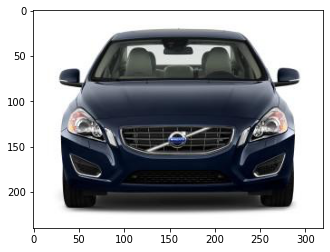

In [ ]:
plt.imshow(test_img)

In [ ]:
"""🛑 Undanta felmeddelandet efter detta kommand pga bild "shape (None, 224, 224, 3)" some inte stämmer med våra bild"""
model.predict(test_img)

ValueError: ignored

In [ ]:
# Nuvarande Bildshaped 
test_img.shape

(240, 320, 3)

In [ ]:
# Låt ampassa bild till den rekommanderad shaped
images = test_img
size = IMAGE_SIZE[:-1]
input_img = tf.image.resize(
    images, size, preserve_aspect_ratio=False,
    antialias=False, name=None)

In [ ]:
input_img.shape # ny bildshaped

TensorShape([224, 224, 3])

In [ ]:
# Förväntade felmeddelande pga shape=(None, 224, 224, 3)
model.predict(input_img)

ValueError: ignored

In [ ]:
# 'Expand dimension Operation' för bildshaped korrigering (None=1)
input_data = np.expand_dims(input_img, axis=0)
input_data.shape

In [ ]:
prediction = model.predict(input_data)
prediction

In [ ]:
np.argmax(prediction[0])

In [ ]:
train_generator.class_indices

{'Acura': 0, 'Volvo': 1}

In [ ]:
train_generator.class_indices.keys()

dict_keys(['Acura', 'Volvo'])

In [ ]:
class_ = list(train_generator.class_indices.keys())
class_[np.argmax(prediction[0])] # Indexed Volvo pga test_img[0] = Volvo

'Volvo'

In [ ]:
import tensorflow as tf

In [141]:
# ladda en förtränad modell
model_path = "VGGmodel/models/VGG19_model_at_20201206_143128.h5"
loaded_model = tf.keras.models.load_model(model_path)

In [143]:
import matplotlib.pyplot as plt
import numpy as np

In [145]:
test_image_path = "/content/drive/MyDrive/Colab Notebooks/VGG_19/Images/Volvo/Volvo_S60_2011_37_18_300_30_6_73_58_182_18_AWD_5_4_4dr_AtT.jpg" ## volvo bild
test_img = plt.imread(test_image_path)

In [147]:
input_data = np.expand_dims(test_img, axis=0)
input_data.shape

(1, 240, 320, 3)

In [148]:
loaded_model.predict(test_img) #Förväntad felmeddelandet

ValueError: ignored

In [152]:
#bILDkORRIGERING
input_data2 = tf.image.resize(test_img, size=(224,224))
input_data2.shape

TensorShape([224, 224, 3])

In [154]:
expand_input = np.expand_dims(input_data2,axis=0)
expand_input.shape

(1, 224, 224, 3)

In [155]:
loaded_model.predict(expand_input)

array([[0., 1.]], dtype=float32)

In [157]:
preProcessed_input = tf.keras.applications.vgg19.preprocess_input(input_data2)
preProcessed_input.shape

TensorShape([224, 224, 3])

In [158]:
expand_input2 = np.expand_dims(input_data2,axis=0)
expand_input2.shape

(1, 224, 224, 3)

In [159]:
loaded_model.predict(expand_input2)

array([[0., 1.]], dtype=float32)

*Den enda förbehandling vi gör är att subtrahera det genomsnittliga RGB-värdet, beräknat på träningsuppsättningen, från varje pixel*.


*   **UPPSATS**  [VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE IMAGE RECOGNITION](https://arxiv.org/pdf/1409.1556.pdf) 🛀🏾




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


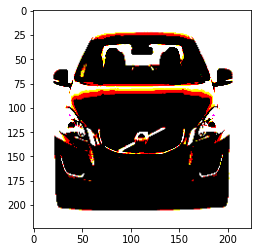

In [164]:
plt.imshow(preProcessed_input)

*TACK FÖR DIN TÅLAMOD*!👍 